In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir

from Algorithms.Functions.DE import DE
from Algorithms.Functions.PSO import PSO

from sklearn.model_selection import train_test_split 


C:\Users\dadmo\AppData\Local\Temp\ipykernel_14924\2436788254.py:38: RuntimeWarning: overflow encountered in square
  return np.sum((train[:, 0] - var9(X, train[:, 1]))**2)
Processing: 100%|████████████████████████████████████████| 100/100 [00:00<00:00, 153.28step/s]
C:\Users\dadmo\AppData\Local\Temp\ipykernel_14924\2436788254.py:36: RuntimeWarning: overflow encountered in square
  return np.sum((test[:, 0] - var9(X, test[:, 1]))**2)
Processing: 100%|████████████████████████████████████████| 100/100 [00:00<00:00, 100.24step/s]


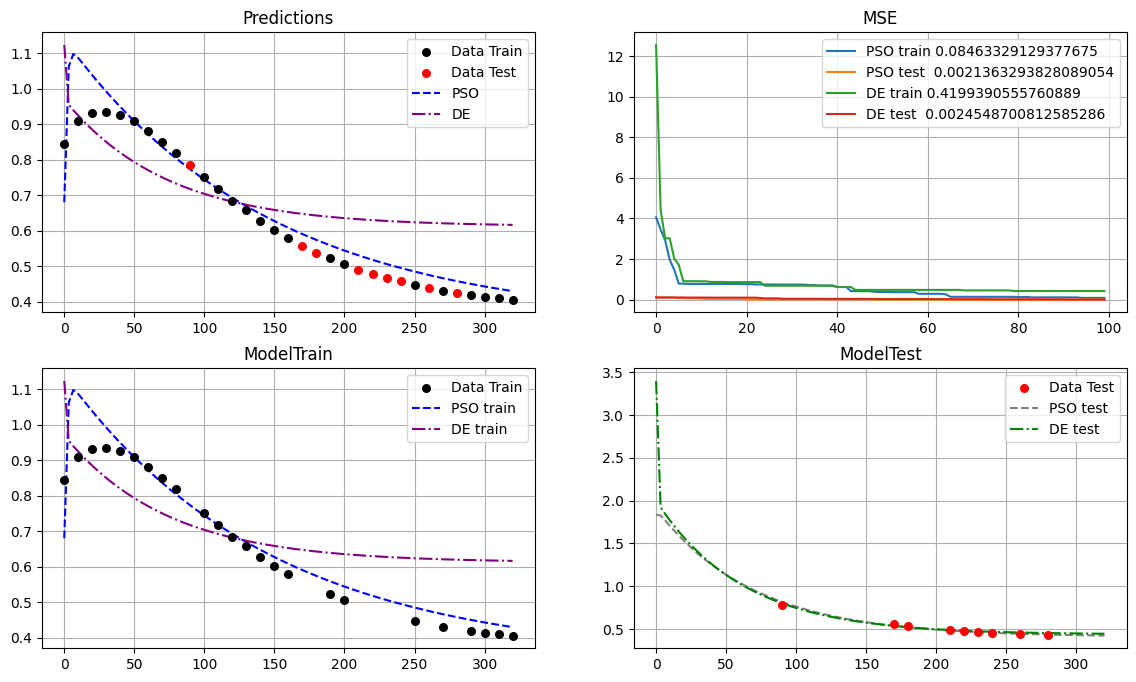

Processing: 100%|████████████████████████████████████████| 100/100 [00:01<00:00, 96.79step/s]


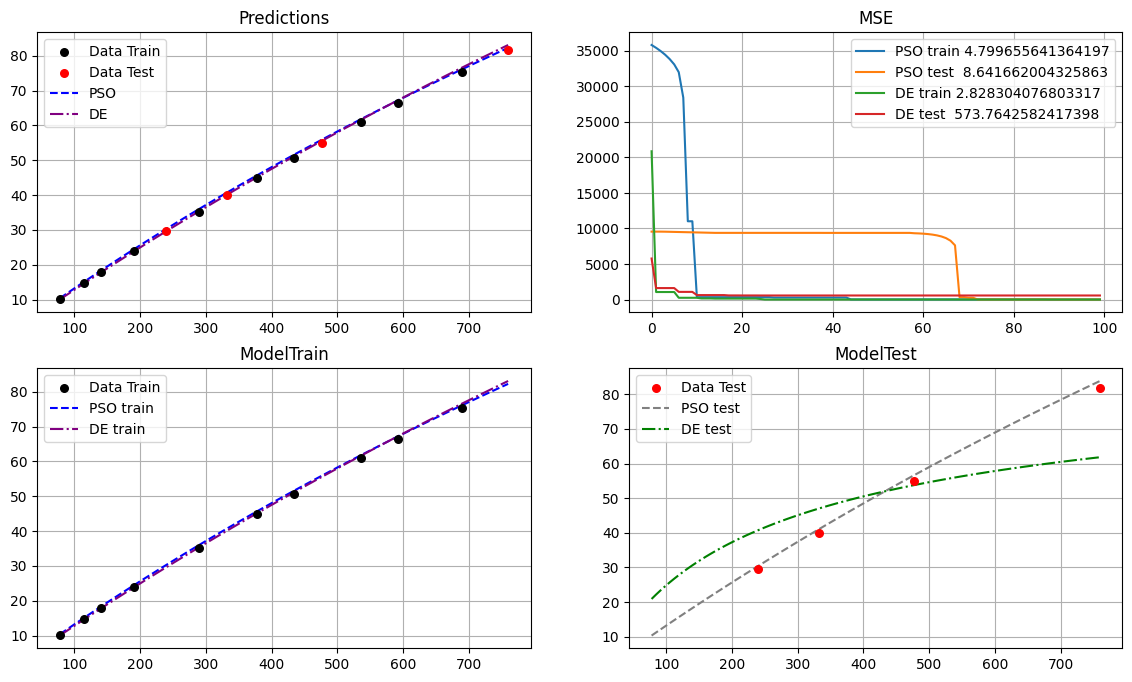

Processing: 100%|████████████████████████████████████████| 100/100 [00:00<00:00, 100.98step/s]


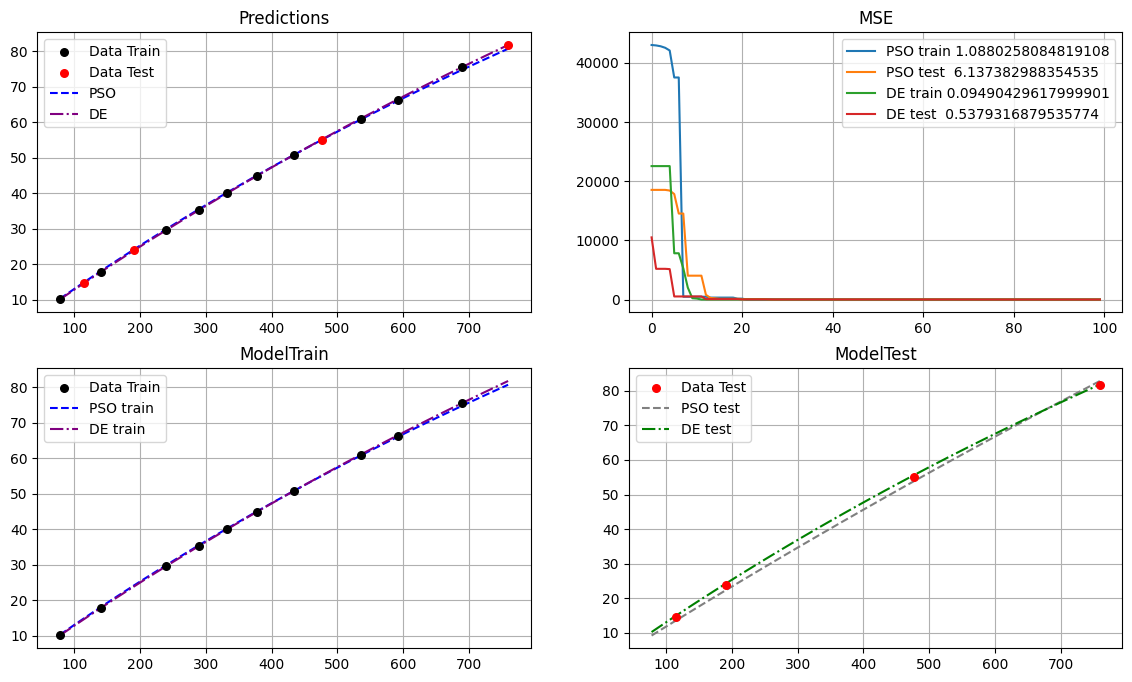

In [6]:

path = "."
lab_name = "Lab6"
if lab_name in listdir(path):
    path += "/" + lab_name
    if "Data" in listdir(path):
        path += "/Data"
        datas_path = [path + "/" + data for data in listdir(path)]
    else:
        raise Exception(f"Data directory in {lab_name} directory not found")
else:
    raise Exception(f"{lab_name} directory not found")

def var9(X, dat):
    b1, b2, b3, b4, b5 = X
    return b1 + b2 * np.exp(-b4 * dat) + b3 * np.exp(-b5 * dat)

def var10(X, dat):
    b1, b2 = X
    return b1 * (1 - 1/(np.sqrt(1 + 2 * b2 * dat)))

def var11(X, dat):
    b1, b2 = X
    return (b1 * b2 * dat) / (1 + b2 * dat)

lts = [9, 10, 11]
# lts = [11]
# lts = [10]
for i in lts:
    for data_path in datas_path:
            data = pd.read_excel(data_path, sheet_name=f"Var{i:02}")
            # print(data.head(3))
            dat = data.to_numpy()
            train, test = train_test_split(dat, test_size=0.25)

            def funct9_tt(X):
                return np.sum((test[:, 0] - var9(X, test[:, 1]))**2)
            def funct9_tn(X):
                return np.sum((train[:, 0] - var9(X, train[:, 1]))**2)

            def funct10_tt(X):
                return np.sum((test[:, 0] - var10(X, test[:, 1]))**2)
            def funct10_tn(X):
                return np.sum((train[:, 0] - var10(X, train[:, 1]))**2)

            def funct11_tt(X):
                return np.sum((test[:, 0] - var11(X, test[:, 1]))**2)
            def funct11_tn(X):
                return np.sum((train[:, 0] - var11(X, train[:, 1]))**2)

            funct9_limits = [[0, 10], [0, 5], *[[-2, 2] for _ in range(3)]]
            funct10_limits = [[100, 1000], [0, 1]]
            funct11_limits = [[100, 1000], [0, 1]]
            for _ in range(1):
                pso_tn = PSO(100, 100, [0, 4], [-.15, .15], eval(f"funct{i}_tn"), eval(f"funct{i}_limits"), plot=False, more=True)
                pso_tt = PSO(100, 100, [0, 4], [-.15, .15], eval(f"funct{i}_tt"), eval(f"funct{i}_limits"), plot=False, more=True)
                de_tn = DE(100, 100, eval(f"funct{i}_tn"), eval(f"funct{i}_limits"), plot=False, more=True)
                de_tt = DE(100, 100, eval(f"funct{i}_tt"), eval(f"funct{i}_limits"), plot=False, more=True)

                fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 8))

                ax1.set_title("Predictions")
                ax2.set_title("MSE")
                ax3.set_title("ModelTrain")
                ax4.set_title("ModelTest")


                ax1.scatter(train[:, 1], train[:, 0], c="black", label="Data Train", s=30, zorder=10)
                ax1.scatter(test[:, 1], test[:, 0], c="red", label="Data Test", s=30, zorder=10)
                x_lims = (dat[:, 1].min(), dat[:, 1].max())
                x = np.linspace(*x_lims, 100)

                ax1.plot(x, eval(f"var{i}")(pso_tn[1], x), "b--", label="PSO")
                # ax1.plot(x, eval(f"var{i}")(pso_tn[1], x), "b--", label="PSO train")
                # ax1.plot(x, eval(f"var{i}")(pso_tt[1], x), "--", color="gray", label="PSO test")
                ax1.plot(x, eval(f"var{i}")(de_tn[1], x), "-.", color="purple", label="DE")
                # ax1.plot(x, eval(f"var{i}")(de_tn[1], x), "-.", color="purple", label="DE train")
                # ax1.plot(x, eval(f"var{i}")(de_tt[1], x), "-.", color="green", label="DE test")

                
                ax2.plot(pso_tn[4], label=f"PSO train {pso_tn[0]}")
                ax2.plot(pso_tt[4], label=f"PSO test  {pso_tt[0]}")
                ax2.plot(de_tn[4], label=f"DE train {de_tn[0]}")
                ax2.plot(de_tt[4], label=f"DE test  {de_tt[0]}")

                ax3.scatter(train[:, 1], train[:, 0], c="black", label="Data Train", s=30, zorder=10)
                ax3.plot(x, eval(f"var{i}")(pso_tn[1], x), "b--", label="PSO train")
                ax3.plot(x, eval(f"var{i}")(de_tn[1], x), "-.", color="purple", label="DE train")

                ax4.scatter(test[:, 1], test[:, 0], c="red", label="Data Test", s=30, zorder=10)
                ax4.plot(x, eval(f"var{i}")(pso_tt[1], x), "--", color="gray", label="PSO test")
                ax4.plot(x, eval(f"var{i}")(de_tt[1], x), "-.", color="green", label="DE test")

                ax1.legend()
                ax2.legend()
                ax3.legend()
                ax4.legend()
                ax1.grid(True)
                ax2.grid(True)
                ax3.grid(True)
                ax4.grid(True)
                
                plt.show()